<a href="https://colab.research.google.com/github/KEMAL-MUDIE/kemal/blob/main/SARSA_and_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get install -y xvfb
!pip install pyvirtualdisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 38 not upgraded.
Need to get 7,814 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [3]:
render_problem = lambda: None
render_action_path = lambda move_list,color: None

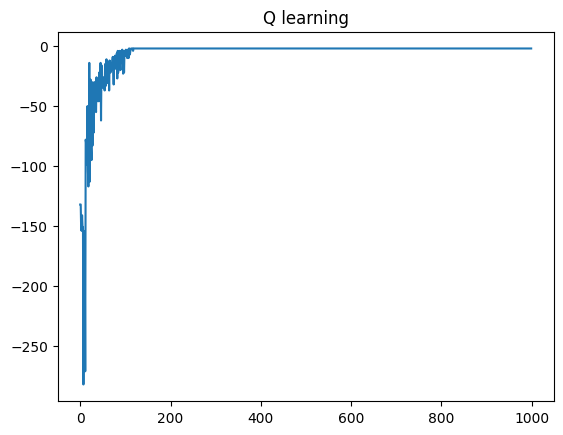

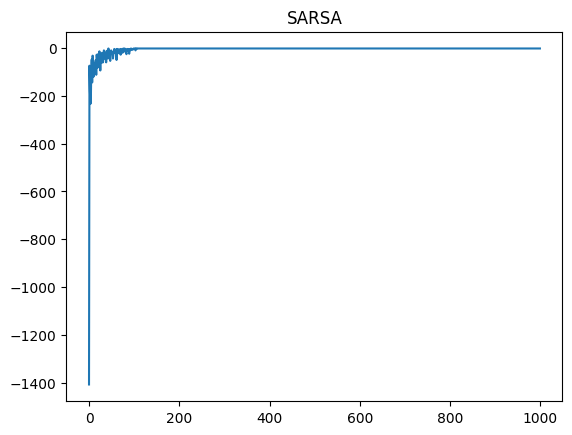

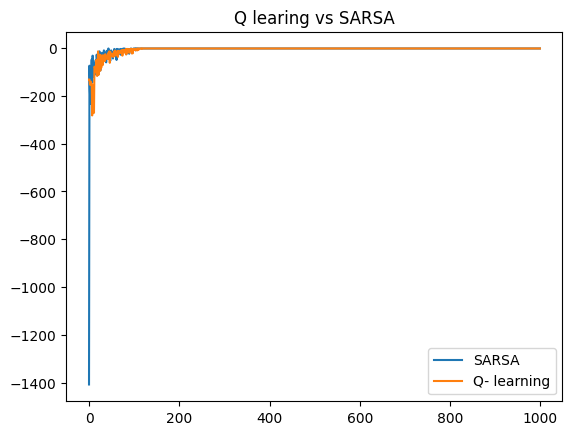

start Q learning ??start Q learning
start SARSA ??start SARSA



''

In [9]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import turtle as t

############################################################################
############################################################################
############################################################################
#create env
def create_environment(gold_position,cliff_position_list,normal_reward,gold_reward,cliff_reward):
    #position
    env_position = np.arange(0,48).reshape(4,12)

    #coordinate
    env_coordinate_dict = {}
    for row in range(env_position.shape[0]):
        for col in range(env_position.shape[1]):
            env_coordinate_dict[env_position[row,col]] = [row,col]

    #reward
    env_reward = np.zeros(env_position.shape) + normal_reward
    env_reward[env_coordinate_dict[gold_position][0],\
               env_coordinate_dict[gold_position][1]] = gold_reward

    for cliff_position in cliff_position_list:
        env_reward[env_coordinate_dict[cliff_position][0],\
                   env_coordinate_dict[cliff_position][1]] = cliff_reward
    return env_position,env_reward,env_coordinate_dict

def get_available_action():
    return np.arange(0,4),["up","left","right","down"]


def move(action,current_state):
    if all_action_name[action] == "up":
        if env_coordinate_dict[current_state][0] == 0:
            new_state = current_state
        else:
            new_state = current_state - 12

    elif all_action_name[action] == "down":
        if env_coordinate_dict[current_state][0] == 3:
            new_state = current_state
        else:
            new_state = current_state + 12

    elif all_action_name[action] == "left":
        if env_coordinate_dict[current_state][1] == 0:
            new_state = current_state
        else:
            new_state = current_state - 1

    elif all_action_name[action] == "right":
        if env_coordinate_dict[current_state][1] == 11:
            new_state = current_state
        else:
            new_state = current_state + 1
    return new_state

def get_reward(new_state):
    row = env_coordinate_dict[new_state][0]
    col = env_coordinate_dict[new_state][1]

    return env_reward[row,col]

def Q_table_initialiser():
    return np.zeros((48,4))

def current_state_initialiser():
    return 36
def update_Q_table(Q_table,current_state,new_state,action,reward):


    current_Q_value = Q_table[current_state,action]
    term = reward + np.amax(Q_table[new_state,:]) - current_Q_value
    new_Q_value = current_Q_value + (alpha * term)

    Q_table[current_state,action] = new_Q_value


def update_Q_table_SARSA(Q_table,current_state,new_state,action,reward):
    current_Q_value = Q_table[current_state,action]

    #take action
    rand = np.random.uniform()

    if rand < 1 - epsilon:
        #exploit
        new_action = np.argmax(Q_table[new_state,:])

    else:
        #explore
        new_action = np.random.randint(0,4)

    max_Q = Q_table[new_state,new_action]
    term = reward + max_Q - current_Q_value
    new_Q_value = current_Q_value + (alpha * term)

    Q_table[current_state,action] = new_Q_value

    return new_action

def render_problem():
    for key in env_coordinate_dict.keys():

        row = env_coordinate_dict[key][0] * 50
        column = env_coordinate_dict[key][1]* 50

        x = column
        y = -row

        t.penup()
        t.goto(x - 200,y + 100)
        t.pendown()
        t.dot(50)

    #start position
    row = env_coordinate_dict[current_state_initialiser()][0] * 50
    column = env_coordinate_dict[current_state_initialiser()][1]* 50

    x = column
    y = -row

    t.penup()
    t.goto(x - 200,y + 100)
    t.pendown()
    t.dot(25,"white")

    #end position
    row = env_coordinate_dict[gold_position][0] * 50
    column = env_coordinate_dict[gold_position][1]* 50
    x = column
    y = -row
    t.penup()
    t.goto(x - 200,y + 100)
    t.pendown()
    t.dot(25,"white")

    #cliff position
    for cliff_position in cliff_position_list:
        row = env_coordinate_dict[cliff_position][0] * 50
        column = env_coordinate_dict[cliff_position][1]* 50

        x = column
        y = -row
        t.penup()
        t.goto(x - 200,y + 100)
        t.pendown()
        t.dot(25,"red")

def render_action_path(move_list,color):
    #draw action path
    t.penup()
    t.pencolor(color)
    for each_move in move_list:
        row = env_coordinate_dict[each_move][0] * 50
        column = env_coordinate_dict[each_move][1]* 50

        x = column
        y = -row
        t.goto(x - 200,y + 100)
        t.pendown()
        t.pensize(25)
############################################################################
############################################################################
############################################################################
#input param
gold_position = 47
cliff_position_list = np.arange(37,47)
normal_reward = -1
gold_reward = 10
cliff_reward = -100
alpha = 0.1
num_episode = 1000
epsilon = 0
############################################################################
############################################################################
############################################################################
#Q learning



#initialise Q table
Q_table = Q_table_initialiser()

#initilise env, states, reward, action
env_position,env_reward,env_coordinate_dict = \
    create_environment(gold_position,cliff_position_list,normal_reward,gold_reward,cliff_reward)

all_action_index,all_action_name = get_available_action()

#track reward
total_reward_Q_learning = []

for i in range(0,num_episode):
    #print(i)
    #start: initialise current state
    current_state = current_state_initialiser()

    #total reward
    total_reward_each_eps = []


    while True:
        #take action
        rand = np.random.uniform()

        if rand < 1 - epsilon:
            #exploit
            action = np.argmax(Q_table[current_state,:])

        else:
            #explore
            action = np.random.randint(0,4)

        #observation new state and get reward
        new_state = move(action,current_state)
        reward = get_reward(new_state)
        total_reward_each_eps.append(reward)


        #update Q table
        update_Q_table(Q_table,current_state,new_state,action,reward)

        #update state
        current_state = new_state

        #check termination condition
        if current_state == gold_position or current_state in cliff_position_list:
            break

    total_reward_Q_learning.append(np.sum(total_reward_each_eps))


#visualise
plt.figure()
plt.title("Q learning")
plt.plot(total_reward_Q_learning)
plt.show()
############################################################################
############################################################################
############################################################################
#perform best action Q learning

total_reward_each_eps = []
move_list_Q_learning = []

#start: initialise current state
current_state = current_state_initialiser()
while True:
    move_list_Q_learning.append(current_state)
    #take action
    rand = np.random.uniform()


    #exploit
    action = np.argmax(Q_table[current_state,:])



    #observation new state and get reward
    new_state = move(action,current_state)
    reward = get_reward(new_state)
    total_reward_each_eps.append(reward)



    #update Q table
    update_Q_table(Q_table,current_state,new_state,action,reward)

    #update state
    current_state = new_state

    #check termination condition
    if current_state == gold_position or current_state in cliff_position_list:
        break

move_list_Q_learning.append(current_state)

############################################################################
############################################################################
############################################################################
#SARSA



#initialise Q table
Q_table = Q_table_initialiser()

#initilise env, states, reward, action
env_position,env_reward,env_coordinate_dict = \
    create_environment(gold_position,cliff_position_list,normal_reward,gold_reward,cliff_reward)

all_action_index,all_action_name = get_available_action()

#track reward
total_reward_SARSA = []

for i in range(0,num_episode):
    #print(i)
    #start: initialise current state
    current_state = current_state_initialiser()

    #total reward
    total_reward_each_eps = []

    #take action
    rand = np.random.uniform()

    if rand < 1- epsilon:
        #exploit
        action = np.argmax(Q_table[current_state,:])

    else:
        #explore
        action = np.random.randint(0,4)
    while True:


        #observation new state and get reward
        new_state = move(action,current_state)
        reward = get_reward(new_state)
        total_reward_each_eps.append(reward)


        #update Q table
        new_action = update_Q_table_SARSA(Q_table,current_state,new_state,action,reward)

        #update state and action
        current_state = new_state
        action = new_action

        #check termination condition
        if current_state == gold_position:
            break

    total_reward_SARSA.append(np.sum(total_reward_each_eps))


#visualise
plt.figure()
plt.title("SARSA")
plt.plot(total_reward_SARSA)
plt.show()

############################################################################
############################################################################
############################################################################
#perform best action SARSA

total_reward_each_eps = []
move_list_SARSA = []

#start: initialise current state
current_state = current_state_initialiser()
while True:
    move_list_SARSA.append(current_state)
    #take action
    rand = np.random.uniform()


    #exploit
    action = np.argmax(Q_table[current_state,:])



    #observation new state and get reward
    new_state = move(action,current_state)
    reward = get_reward(new_state)
    total_reward_each_eps.append(reward)



    #update Q table
    update_Q_table(Q_table,current_state,new_state,action,reward)

    #update state
    current_state = new_state

    #check termination condition
    if current_state == gold_position:
        break

move_list_SARSA.append(current_state)

############################################################################
############################################################################
############################################################################
#compare Q learning and SARSA

plt.figure()
plt.title("Q learing vs SARSA")
plt.plot(total_reward_SARSA,label = "SARSA")
plt.plot(total_reward_Q_learning,label = "Q- learning")
plt.legend()
plt.show()

############################################################################
############################################################################
############################################################################
#rendering

render_problem()
input("start Q learning ??")
render_action_path(move_list_Q_learning,"green")
input("start SARSA ??")
render_action_path(move_list_SARSA,"blue")
input("")